In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import mpl_toolkits.mplot3d as Axes3D
%matplotlib notebook

In [318]:
# import parameter optimization results
short = pd.read_csv("C:/Users/basti/Documents/GitHub/PS_in_AI/GeneticAlgorithm/short.csv")
short = short.drop(['cre_p','dupl_p','mut_p','cross_p'], axis=1)
#short['score'].nsmallest(5)

# import wsk csv
wsk = pd.read_csv("C:/Users/basti/Documents/GitHub/PS_in_AI/GeneticAlgorithm/wsk.csv")
wsk = wsk.drop(['n_pop','n_max'], axis=1)

# import warm start
wstart = pd.read_csv("C:/Users/basti/Documents/GitHub/PS_in_AI/GeneticAlgorithm/wstart.csv")
wstart = wstart.drop(['cre_p','dupl_p','mut_p','cross_p'], axis=1)

# cross mut
cmwarm = pd.read_csv("C:/Users/basti/Documents/GitHub/PS_in_AI/GeneticAlgorithm/crossmut_warm.csv")
cmcold = pd.read_csv("C:/Users/basti/Documents/GitHub/PS_in_AI/GeneticAlgorithm/crossmut_cold.csv")

cmwarm = cmwarm.drop(['n_pop','n_max','cre_p','dupl_p'], axis=1)
cmcold = cmcold.drop(['n_pop','n_max','cre_p','dupl_p'], axis=1)

# benchmarks
bench = pd.read_csv("C:/Users/basti/Documents/GitHub/PS_in_AI/GeneticAlgorithm/bench.csv")

In [320]:
# calculate mean
smean = short.groupby(['n_pop','n_max']).mean()
#print(smean["score"].nsmallest(30))
scored = smean.loc[:,'score']

wmean = wstart.groupby(['n_pop','n_max']).mean()
wscored = wmean.loc[:,'score']

wskmean = wsk.groupby(['cre_p','dupl_p','mut_p','cross_p']).mean()
wskscore = wskmean.loc[:,'score']

cmw_mean = cmwarm.groupby(['mut_p','cross_p']).mean()
cmw_score = cmw_mean.loc[:,'score']

cmc_mean = cmcold.groupby(['mut_p','cross_p']).mean()
cmc_score = cmc_mean.loc[:,'score']

bench_mean = bench.groupby('file').mean()
bench_min = bench.groupby('file').min()
bench_max = bench.groupby('file').max()

<IPython.core.display.Javascript object>


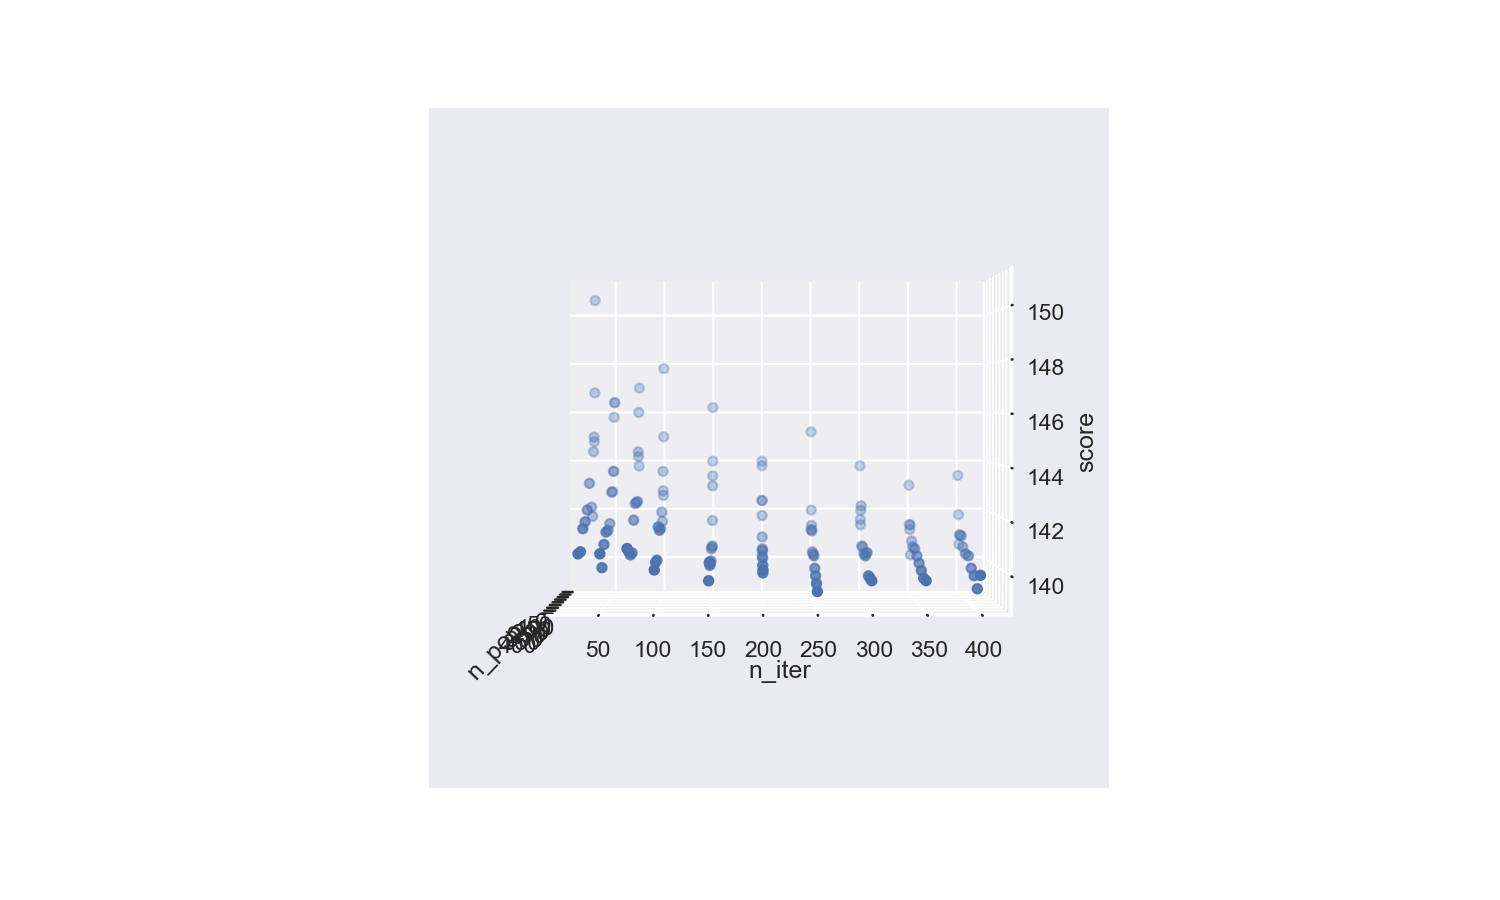

In [154]:
# plot the result
npop = np.array([10, 20, 30, 40, 50, 75, 100, 150, 200, 250, 300, 350, 400])
nmax = np.array([30, 50, 75, 100, 150, 200, 250, 300, 350, 400])

x = np.repeat(npop,10,0)
y = np.tile(nmax,13)
z = scored.values

fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("n_pop")
ax.set_ylabel("n_iter")
ax.set_zlabel("score")
ax.scatter(x,y,z)

<IPython.core.display.Javascript object>


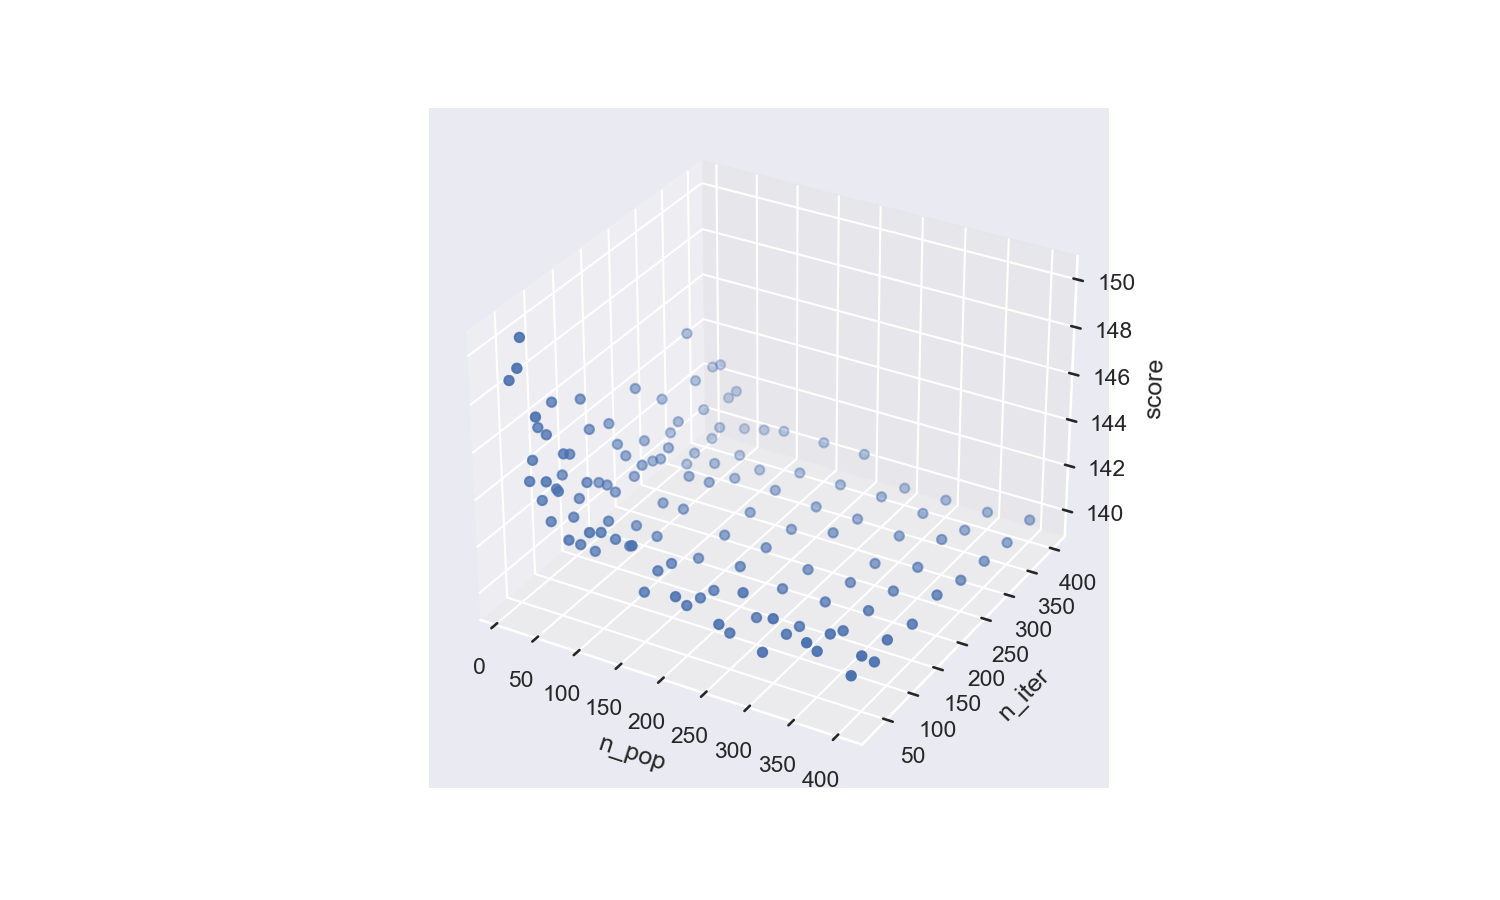

In [198]:
# plot the warmstart
npop = np.array([10, 20, 30, 40, 50, 75, 100, 150, 200, 250, 300, 350, 400])
nmax = np.array([30, 50, 75, 100, 150, 200, 250, 300, 350, 400])

x1 = np.repeat(npop,10,0)
y1 = np.tile(nmax,13)
z1 = wscored.values

fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("n_pop")
ax.set_ylabel("n_iter")
ax.set_zlabel("score")
ax.scatter(x1,y1,z1)

<IPython.core.display.Javascript object>


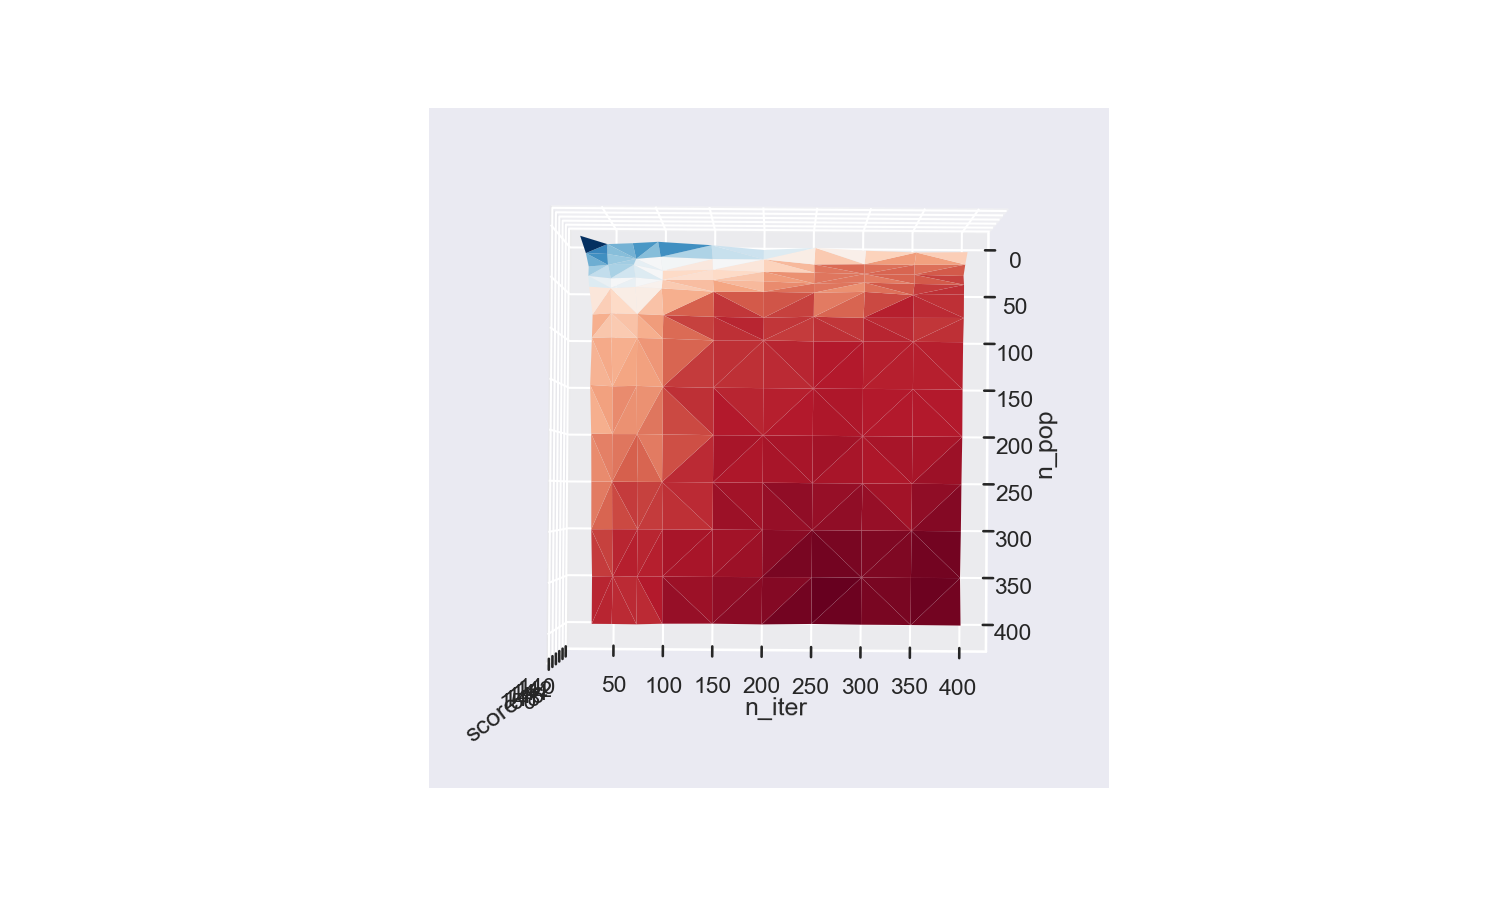

In [189]:
# surface plot
fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.gca(projection='3d')
ax.set_xlabel("n_pop")
ax.set_ylabel("n_iter")
ax.set_zlabel("score")
ax.plot_trisurf(x,y,z, cmap=plt.cm.RdBu, linewidth=0.01)
#fig.colorbar(surf, shrink=0.5, aspect=5)

<IPython.core.display.Javascript object>


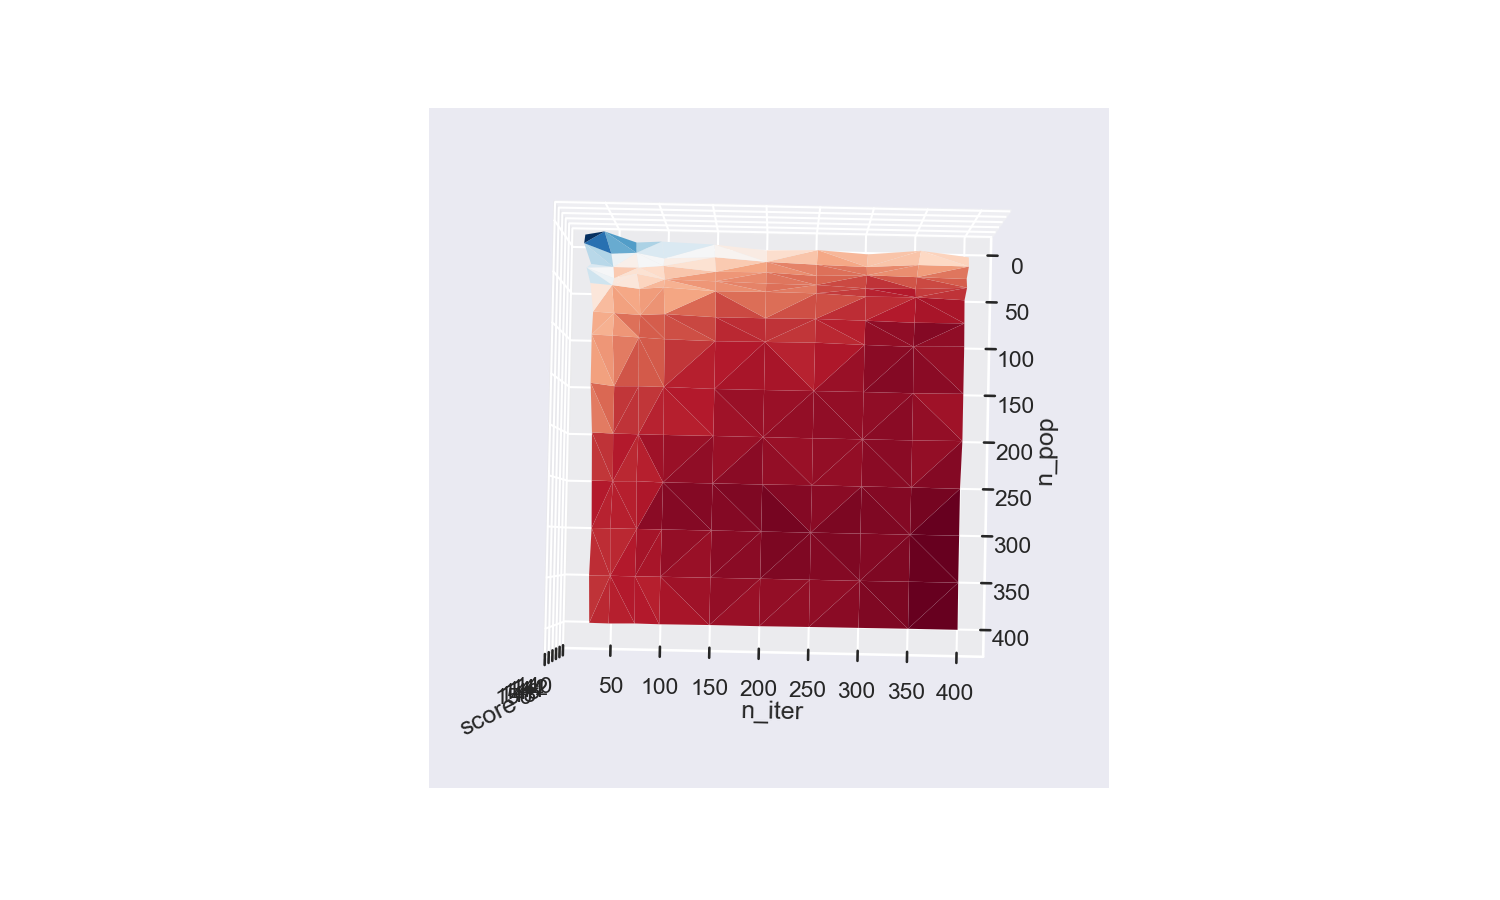

In [190]:
# surface plot warm start
fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.gca(projection='3d')
ax.set_xlabel("n_pop")
ax.set_ylabel("n_iter")
ax.set_zlabel("score")
ax.plot_trisurf(x1,y1,z1, cmap=plt.cm.RdBu, linewidth=0.01)

In [253]:
b30 = wskscore.nsmallest(30).index.tolist()
b30 = [list(ele) for ele in b30]
b30 = np.array(b30)

In [258]:
(sum(b30)/30)/1.375

array([0.22666667, 0.20484848, 0.35151515, 0.2169697 ])

In [305]:
data1 = [cmc_score.values[int(11*i+(11-i))] for i in range(0,11)]
data2 = [cmw_score.values[int(11*i+(11-i))] for i in range(0,11)]

<IPython.core.display.Javascript object>


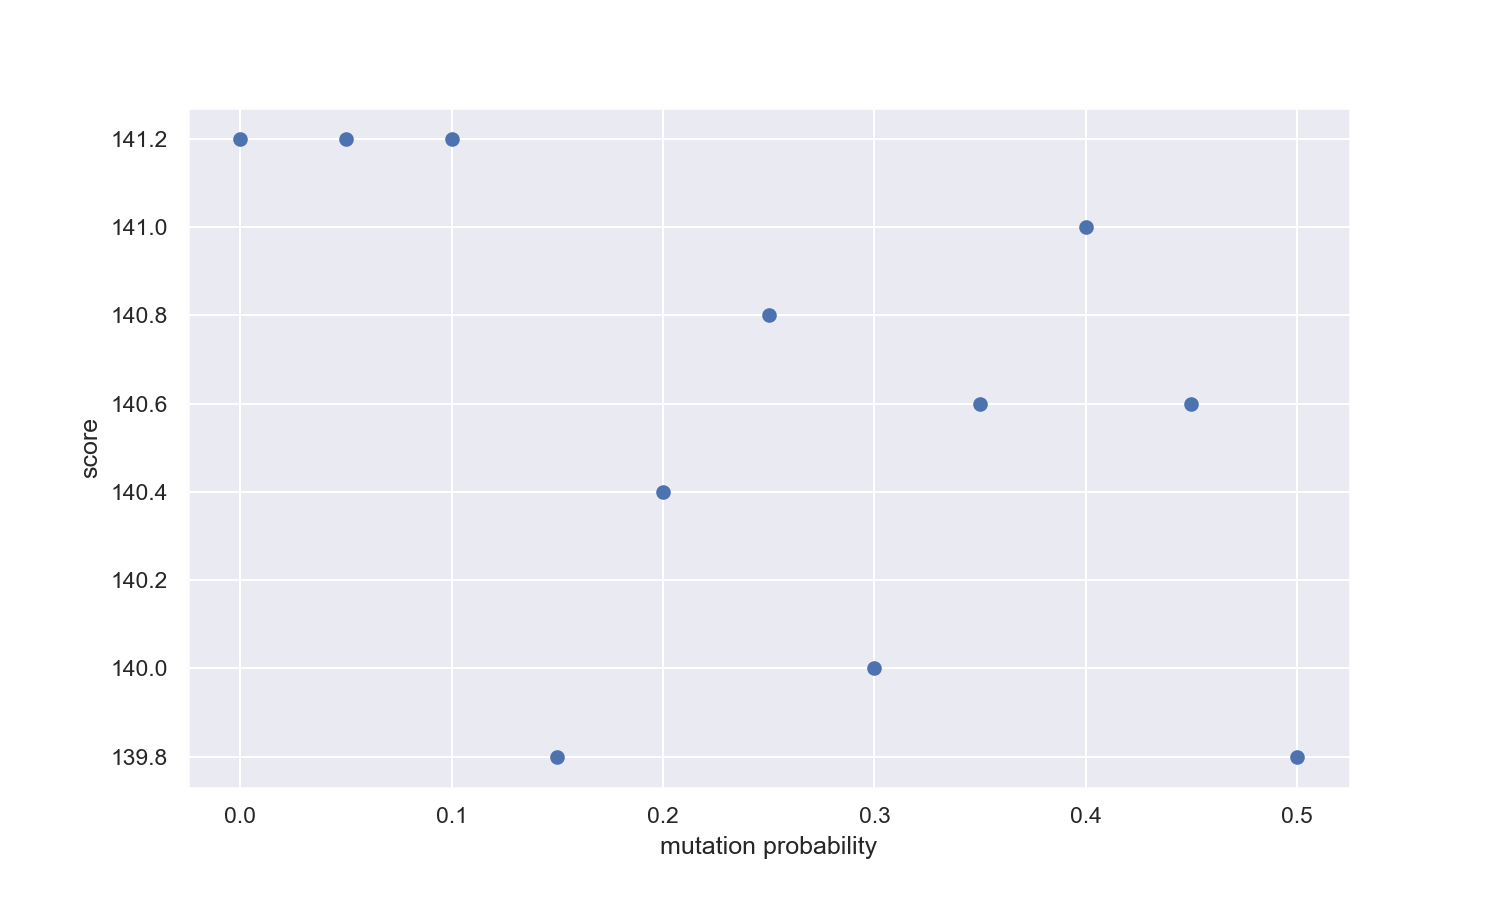

In [312]:
fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.gca()
ax.set_xlabel("mutation probability")
ax.set_ylabel("score")
ax.scatter(wsk1, data1)

<IPython.core.display.Javascript object>


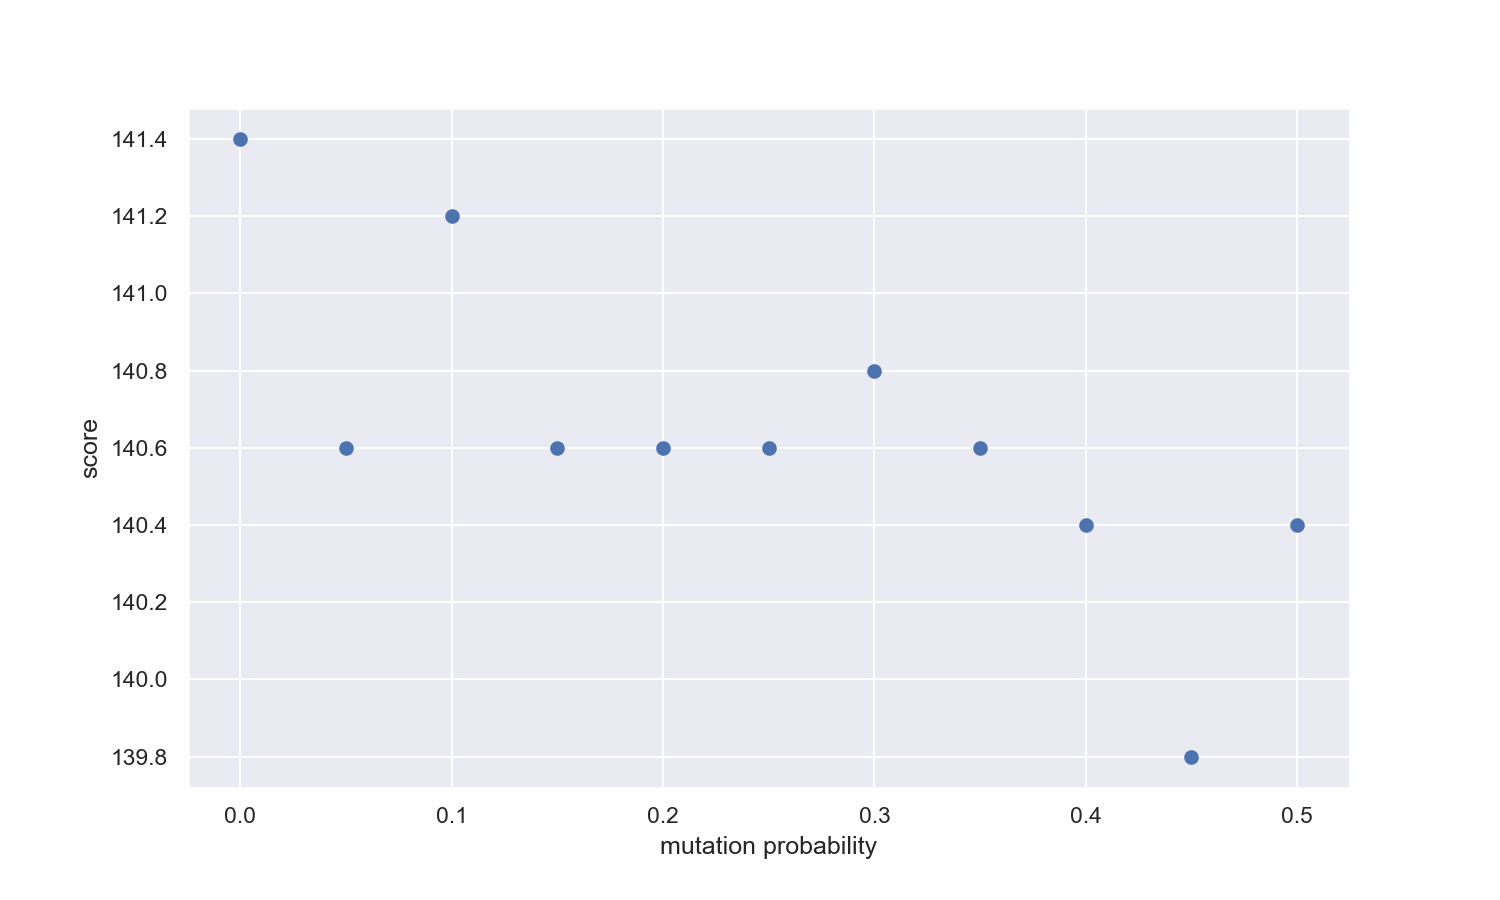

In [313]:
fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.gca()
ax.set_xlabel("mutation probability")
ax.set_ylabel("score")
ax.scatter(wsk1, data2)

In [ ]:
# -> Mutation wichtig um local neighbourhood zu durchsuchen, nur mit crossover nicht so gut

In [315]:
# Benchmark results from minizinc
miniz = [
    ["p1_6_20-3.txt", 'ACAAAAAAAA', 60, 53.973],
    ["p1_10_3-3.txt", 'AAA' ,16, 5.155],
    ["p1_15_3-2.txt", 'ACA' ,32, 5.965],
    ["p1_15_5-4.txt", 'ACAA', 41, 23.142],
    ["p1_15_13-0.txt", 'AACAAAACAA', 77, 42.722],
    ["p1_15_20-0.txt", 'AAAAAAACAA', 150, 147.0],
    ["p1_15_20-3.txt", 'AAAAAACAAA', 150, 56.513],
    ["p2_4_8-3.txt", 'GCTA', 10, 2.193],
    ["p2_6_20-0.txt", 'CGC', 27, 7.277],
    ["p2_10_8-4.txt", 'GCT', 35, 5.78],
    ["p2_10_20-3.txt", 'TATCACTT', 71, 20.761],
    ["p2_15_8-3.txt", 'CGT', 63, 17.5],
    ["p2_15_13-3.txt", 'TGC', 72, 15.973],
    ["p2_15_20-4.txt", 'ATGCAACTG', 123, 42.939]
        ]

In [349]:
tst = pd.DataFrame(miniz, columns=['file','best','score','time'])
tst = tst.set_index("file")
tst

,best,score,time
file,,,
p1_6_20-3.txt,ACAAAAAAAA,60,53.973
p1_10_3-3.txt,AAA,16,5.155
p1_15_3-2.txt,ACA,32,5.965
p1_15_5-4.txt,ACAA,41,23.142
p1_15_13-0.txt,AACAAAACAA,77,42.722
p1_15_20-0.txt,AAAAAAACAA,150,147.000
p1_15_20-3.txt,AAAAAACAAA,150,56.513
p2_4_8-3.txt,GCTA,10,2.193
p2_6_20-0.txt,CGC,27,7.277


<IPython.core.display.Javascript object>


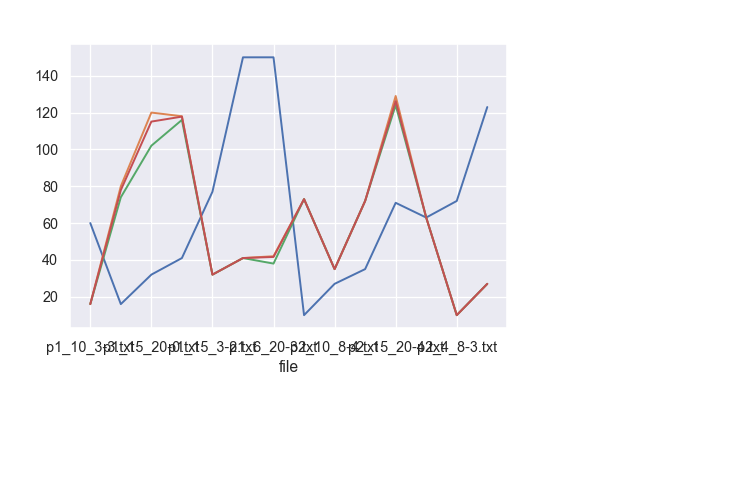

<AxesSubplot:xlabel='file'>

In [358]:
tst['score'].plot()
bench_max['score'].plot()
bench_min['score'].plot()
bench_mean['score'].plot()

<IPython.core.display.Javascript object>


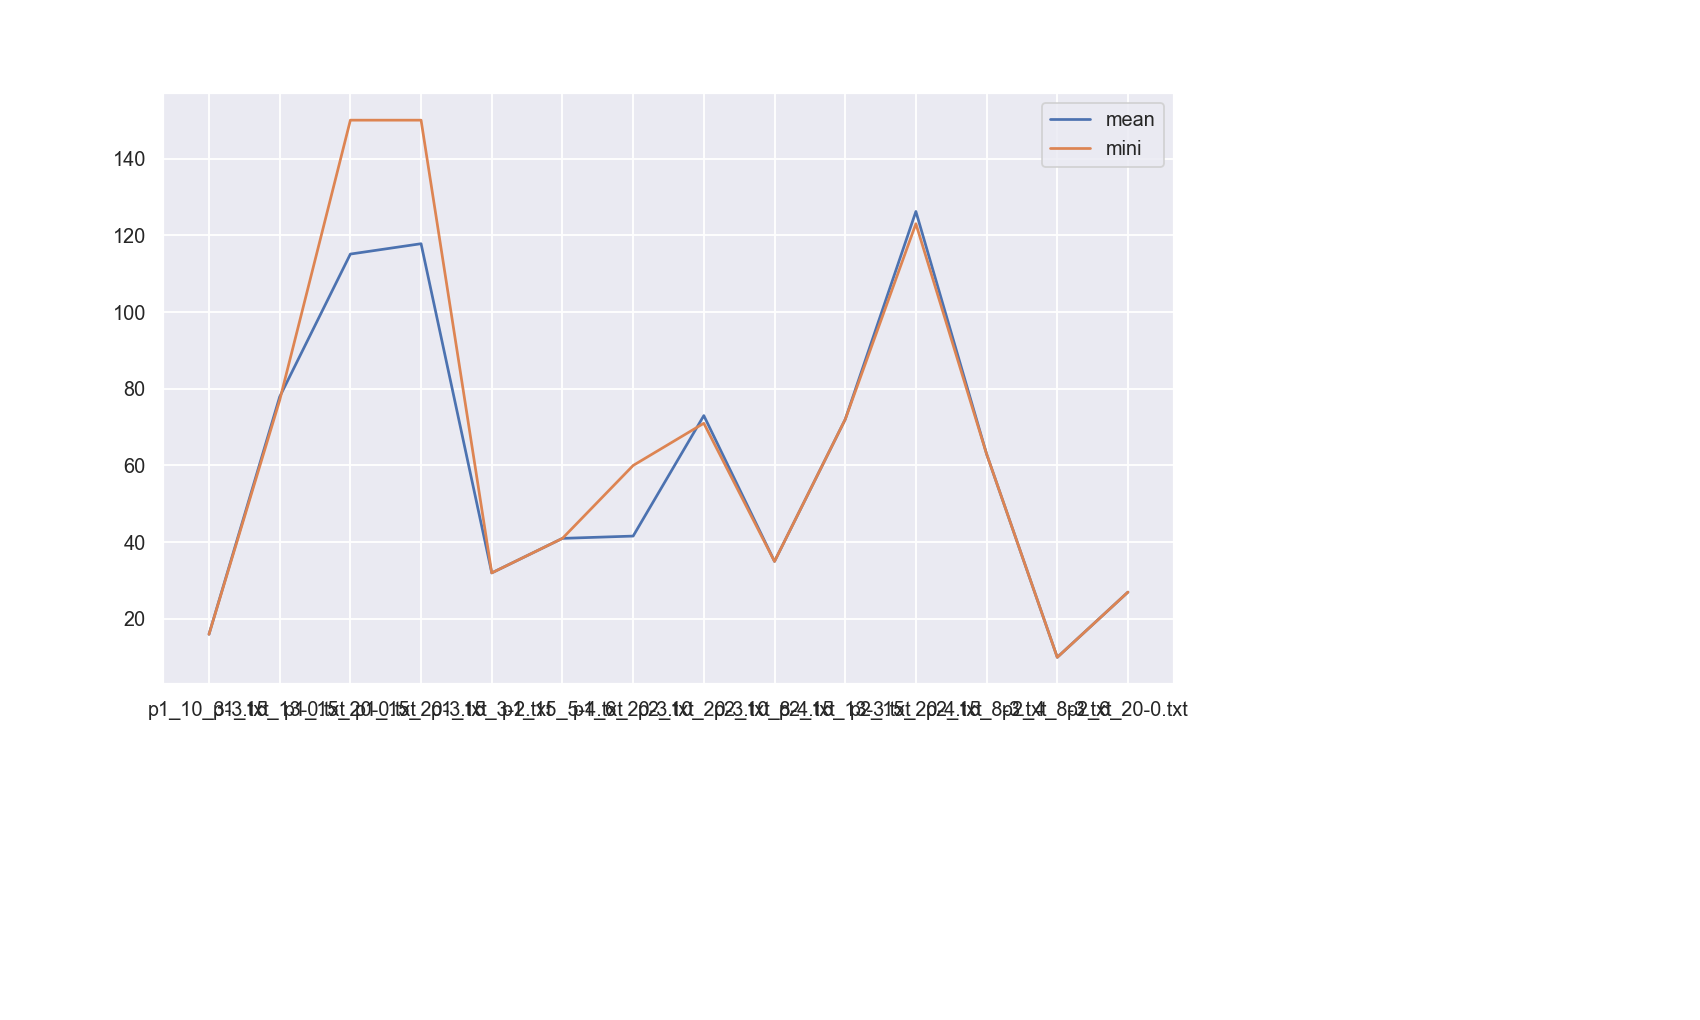

In [368]:
# benchmark simple plot
fig = plt.figure(figsize=(10,6), dpi=100)
ax = fig.gca()
ax.plot(merge.index, merge['score_x'])
ax.plot(merge.index, merge['score_y'])
ax.legend(['mean','mini'])

In [362]:
tst

,best,score,time
file,,,
p1_6_20-3.txt,ACAAAAAAAA,60,53.973
p1_10_3-3.txt,AAA,16,5.155
p1_15_3-2.txt,ACA,32,5.965
p1_15_5-4.txt,ACAA,41,23.142
p1_15_13-0.txt,AACAAAACAA,77,42.722
p1_15_20-0.txt,AAAAAAACAA,150,147.000
p1_15_20-3.txt,AAAAAACAAA,150,56.513
p2_4_8-3.txt,GCTA,10,2.193
p2_6_20-0.txt,CGC,27,7.277


In [363]:
bench_mean

,score,time,run
file,,,
p1_10_3-3.txt,16.0,0.059899,5.5
p1_15_13-0.txt,77.9,0.265106,5.5
p1_15_20-0.txt,115.1,0.533599,5.5
p1_15_20-3.txt,117.8,0.521709,5.5
p1_15_3-2.txt,32.0,0.070408,5.5
p1_15_5-4.txt,41.0,0.092781,5.5
p1_6_20-3.txt,41.6,0.227492,5.5
p2_10_20-3.txt,73.0,0.125171,5.5
p2_10_8-4.txt,35.0,0.063741,5.5


In [364]:
merge = bench_mean.merge(tst, left_index=True, right_index=True)

In [365]:
merge

,score_x,time_x,run,best,score_y,time_y
file,,,,,,
p1_10_3-3.txt,16.0,0.059899,5.5,AAA,16,5.155
p1_15_13-0.txt,77.9,0.265106,5.5,AACAAAACAA,77,42.722
p1_15_20-0.txt,115.1,0.533599,5.5,AAAAAAACAA,150,147.000
p1_15_20-3.txt,117.8,0.521709,5.5,AAAAAACAAA,150,56.513
p1_15_3-2.txt,32.0,0.070408,5.5,ACA,32,5.965
p1_15_5-4.txt,41.0,0.092781,5.5,ACAA,41,23.142
p1_6_20-3.txt,41.6,0.227492,5.5,ACAAAAAAAA,60,53.973
p2_10_20-3.txt,73.0,0.125171,5.5,TATCACTT,71,20.761
p2_10_8-4.txt,35.0,0.063741,5.5,GCT,35,5.780
